In [6]:
import suncal
import numpy as np

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["font.size"] = 10
plt.rcParams["axes.grid"] = True # всегда включать сетку на любых новых графиках

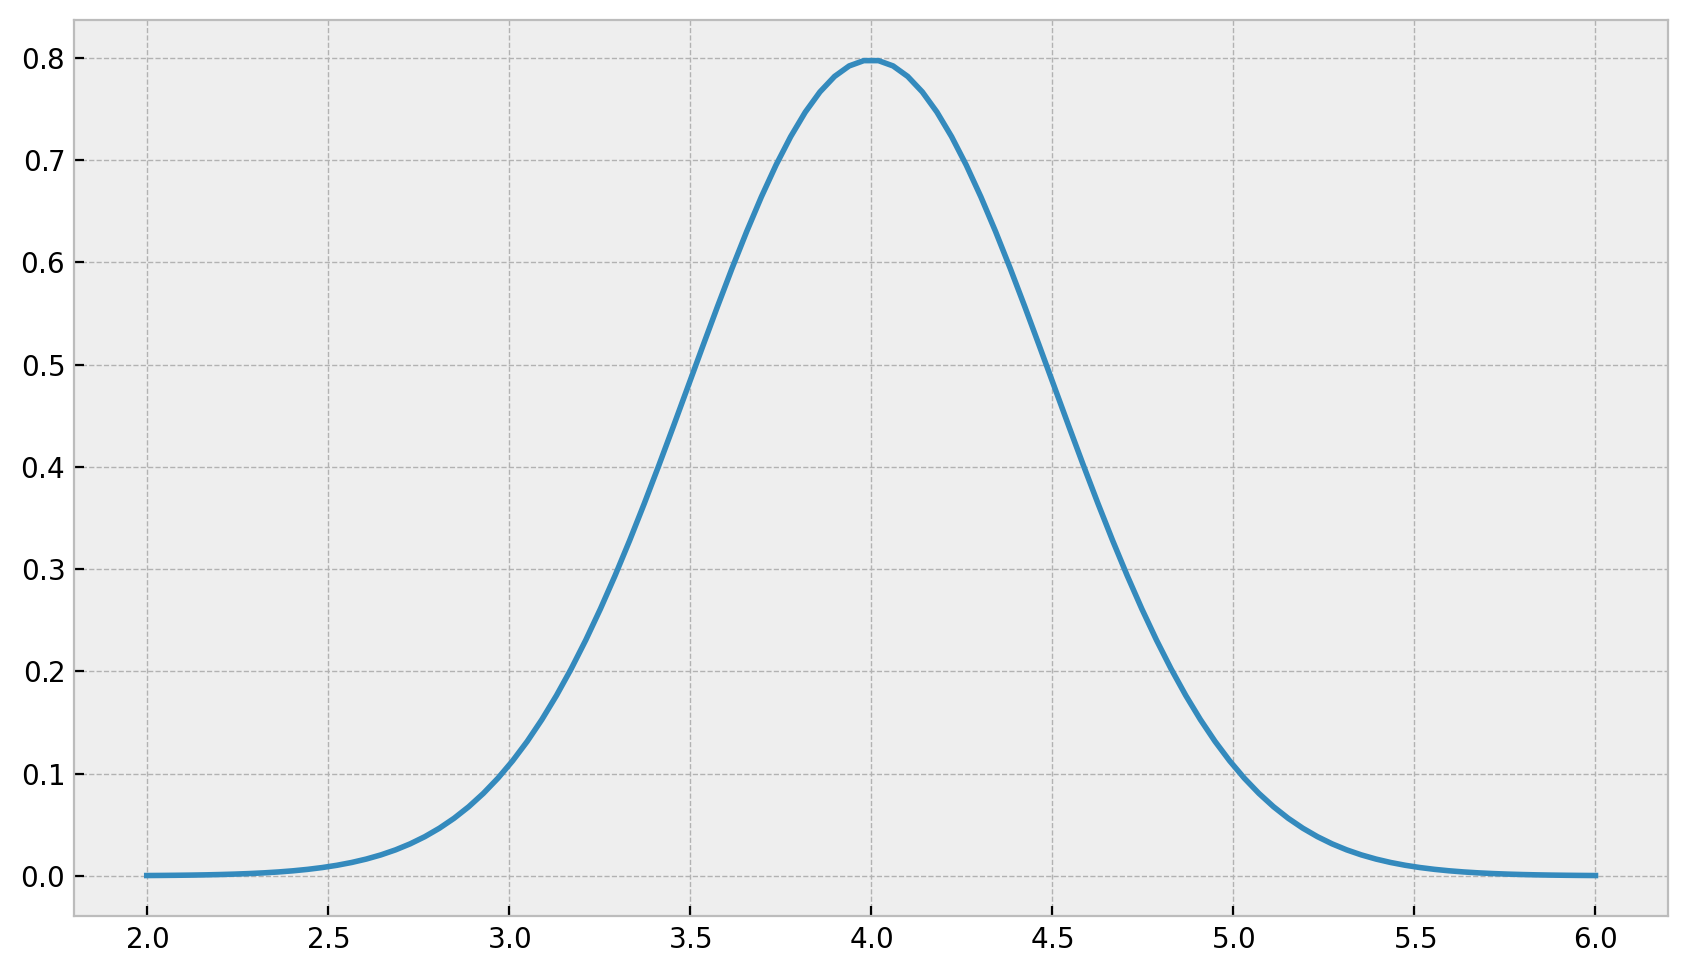

In [8]:
# Гаусс
u = suncal.InputUncert('u', dist='gaussian', nom=4, std=0.5)
x, y = u.pdf()
plt.plot(x.magnitude, y);

In [9]:
u = suncal.UncertCalc('J*V', units='W')
u.set_input('J', nom=4, unc=.04, k=2, units='ampere')
u.set_input('V', nom=20, units='volt')
u.set_uncert('V', name='u(typeA)', std=100, k=2, units='mV')
u.set_uncert('V', name='u(typeB)', std=150, k=2, units='millivolt')
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.82 W           | ± 1.6 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.82 W           | (78.39 W, 81.62 W) | 1.960     | -             |

In [10]:
out = u.calculate()
out.report_sens()

|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$J$   | 20.0 V          | 23.53%           | 20.0 W/A         | 23.56%         |
|$V$   | 4.0 A          | 76.47%           | 0.0040 W/mV         | 76.44%         |

In [11]:
u.correlate_vars('J', 'V', -.75)
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.50 W           | ± 0.97 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.75 W           | (78.53 W, 81.46 W) | 1.959     | -             |

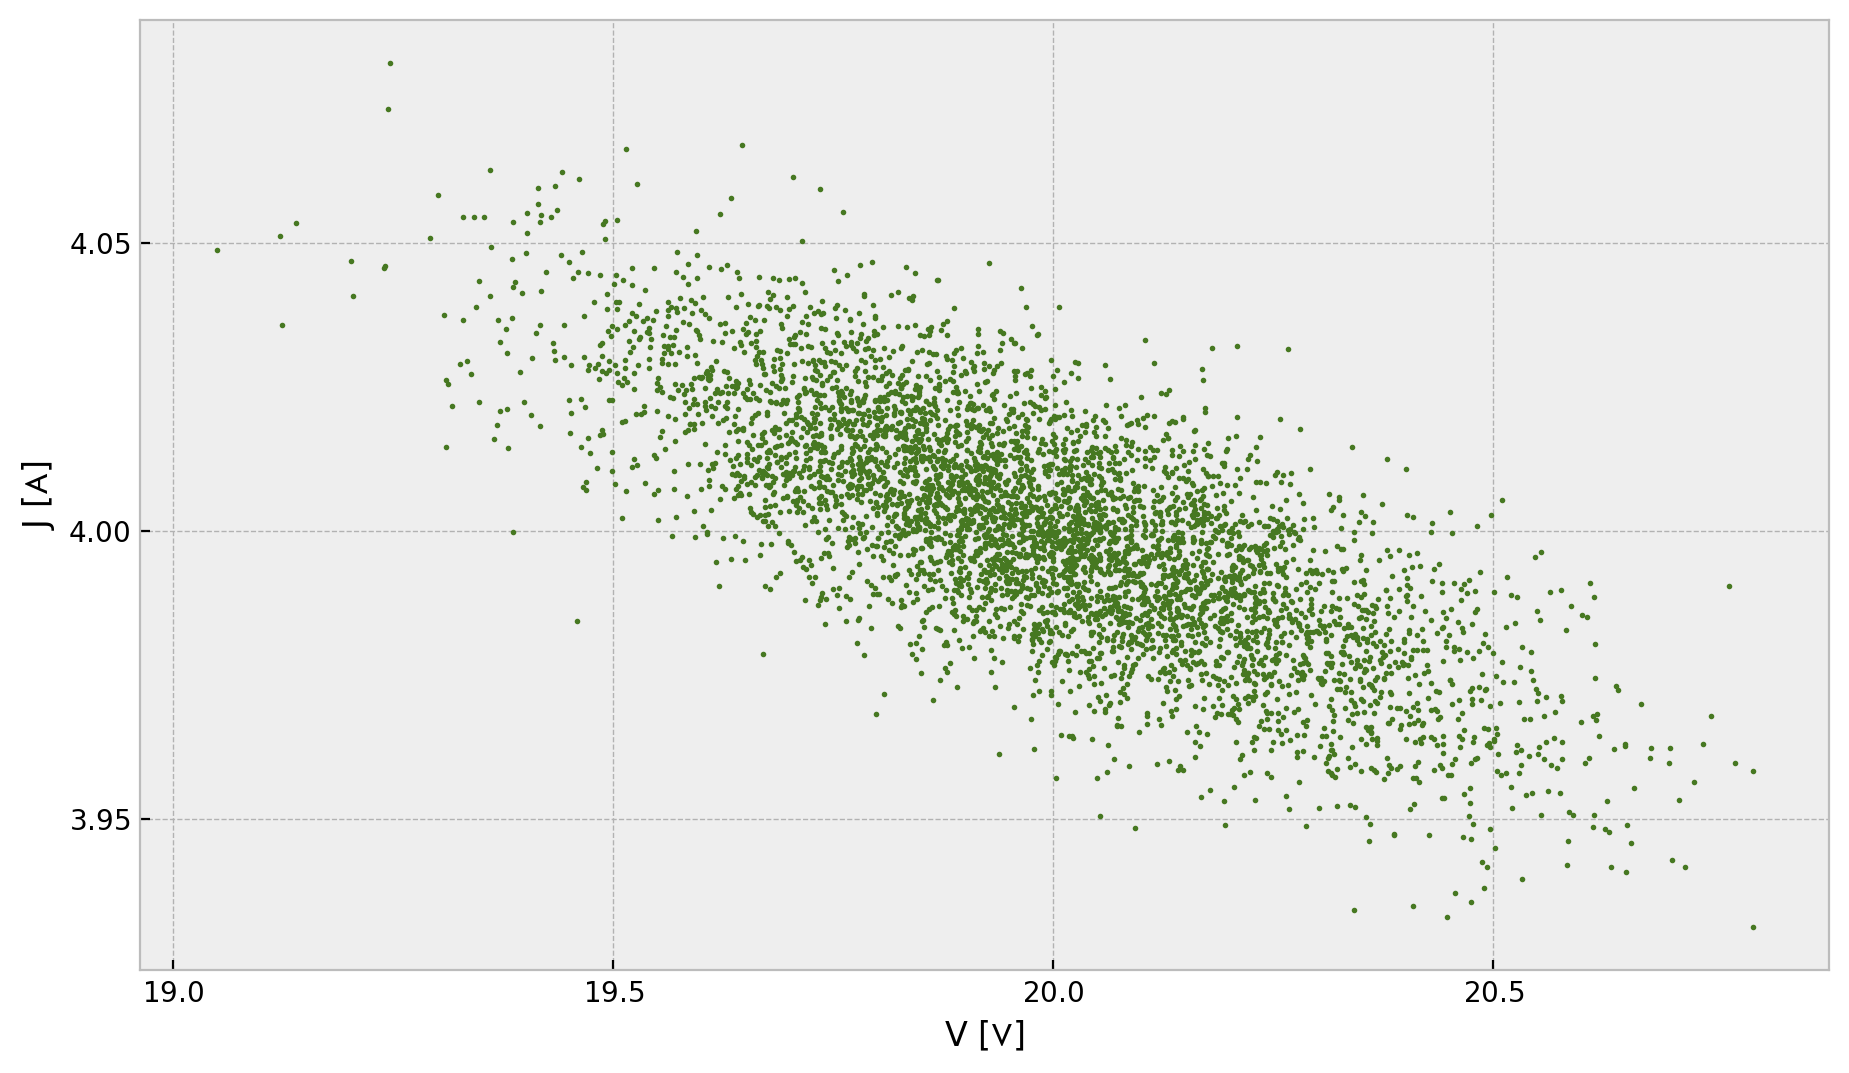

In [13]:
u.out.mc.plot_xscatter(points=5000);

In [14]:
u.out.report_all()

## Summary


|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.50 W           | ± 0.97 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.75 W           | (78.53 W, 81.46 W) | 1.959     | -             |


![IMG0][]



## Standardized Input Values


|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description  |
|----------|---------|------------------|--------------|-------------|
|$J$   | 4.000  | 0.020 A           | inf       |              |
|$V$   | 20  | 180 mV           | inf       |              |



---

## Uncertainty Budget


|Variable   | Component   | Description   | Standard Uncertainty   | Deg. Freedom  |
|----------|-----------|-------------|----------------------|--------------|
|$J$   | -           | --            | 0.020 A               | inf           |
|-          | $u(J)$    | --            | 0.020 A               | inf           |
|$V$   | -           | --            | 180 mV               | inf           |
|-          | $u(typeA)$    | --            | 100 mV               | inf           |
|-          | $u(typeB)$    | --            | 150 mV               | inf           |



---

## Sensitivity Coefficients


|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$J$   | 20.0 V          | 64.69%           | 20.0 W/A         | 28.62%         |
|$V$   | 4.0 A          | 210.24%          | 0.0055 W/mV         | 178.74%        |



---

## Expanded Uncertainties

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$f_{1}$   | 99.00%     | 79 W  | 81 W  | 2.576     | inf            | 1.3 W              |
|-          | 95.00%     | 79 W  | 81 W  | 1.960     | inf            | 0.97 W              |
|-          | 90.00%     | 79 W  | 81 W  | 1.645     | inf            | 0.82 W              |
|-          | 68.00%     | 80 W  | 80 W | 0.994     | inf            | 0.49 W             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$f_{1}$   | 99.00%     | 78 W  | 82 W  | 2.575    |
|-          | 95.00%     | 79 W  | 81 W  | 1.959    |
|-          | 90.00%     | 79 W  | 81 W  | 1.645    |
|-          | 68.00%     | 79 W  | 81 W  | 0.995    |


## GUM Derivation

### Measurement Model:

$f_{1} = J V$

### Input Covariance Matrix:


|-         | $J$  | $V$ |
|---------|---------|---------|
|$J$  | $u_{J}^{2}$  | $\sigma_{JV} u_{J} u_{V}$ |
|$V$  | $\sigma_{JV} u_{J} u_{V}$  | $u_{V}^{2}$ |


### Sensitivity Coefficients:

$\frac{\partial}{\partial J} f_{1} = V$

$\frac{\partial}{\partial V} f_{1} = J$

### Combined Uncertainty:

$u_{f1} = \sqrt{2 \sigma_{JV} u_{J} u_{V} \frac{\partial}{\partial J} f_{1} \frac{\partial}{\partial V} f_{1} + u_{J}^{2} \left(\frac{\partial}{\partial J} f_{1}\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} f_{1}\right)^{2}}$

$u_{f1} = \sqrt{J u_{V} \left(J u_{V} + V \sigma_{JV} u_{J}\right) + V u_{J} \left(J \sigma_{JV} u_{V} + V u_{J}\right)}$

### Effective degrees of freedom:

$\nu_{f1} = \frac{u_{f1}^{4}}{\frac{J^{4} u_{V}^{4}}{\nu_{V}} + \frac{V^{4} u_{J}^{4}}{\nu_{J}}}$

## GUM Validity

### Comparison to Monte Carlo 95.00% Coverage

2 significant digits. δ = 0.0050 W.


|95.00% Coverage    | Lower Limit                    | Upper Limit                   |
|------------------|------------------------------|------------------------------|
|GUM                | 79.03 W                       | 80.97 W                      |
|MC                 | 78.53 W                       | 81.46 W                      |
|abs(GUM - MC)      | 0.50 W                       | 0.48 W                      |
|abs(GUM - MC) < δ  | <font color="red">FAIL</font>  | <font color="red">FAIL</font> |


## Monte Carlo Inputs

![IMG1][]



## Monte Carlo Convergence

![IMG2][]





[IMG0]: 
[IMG1]: 
[IMG2]: 

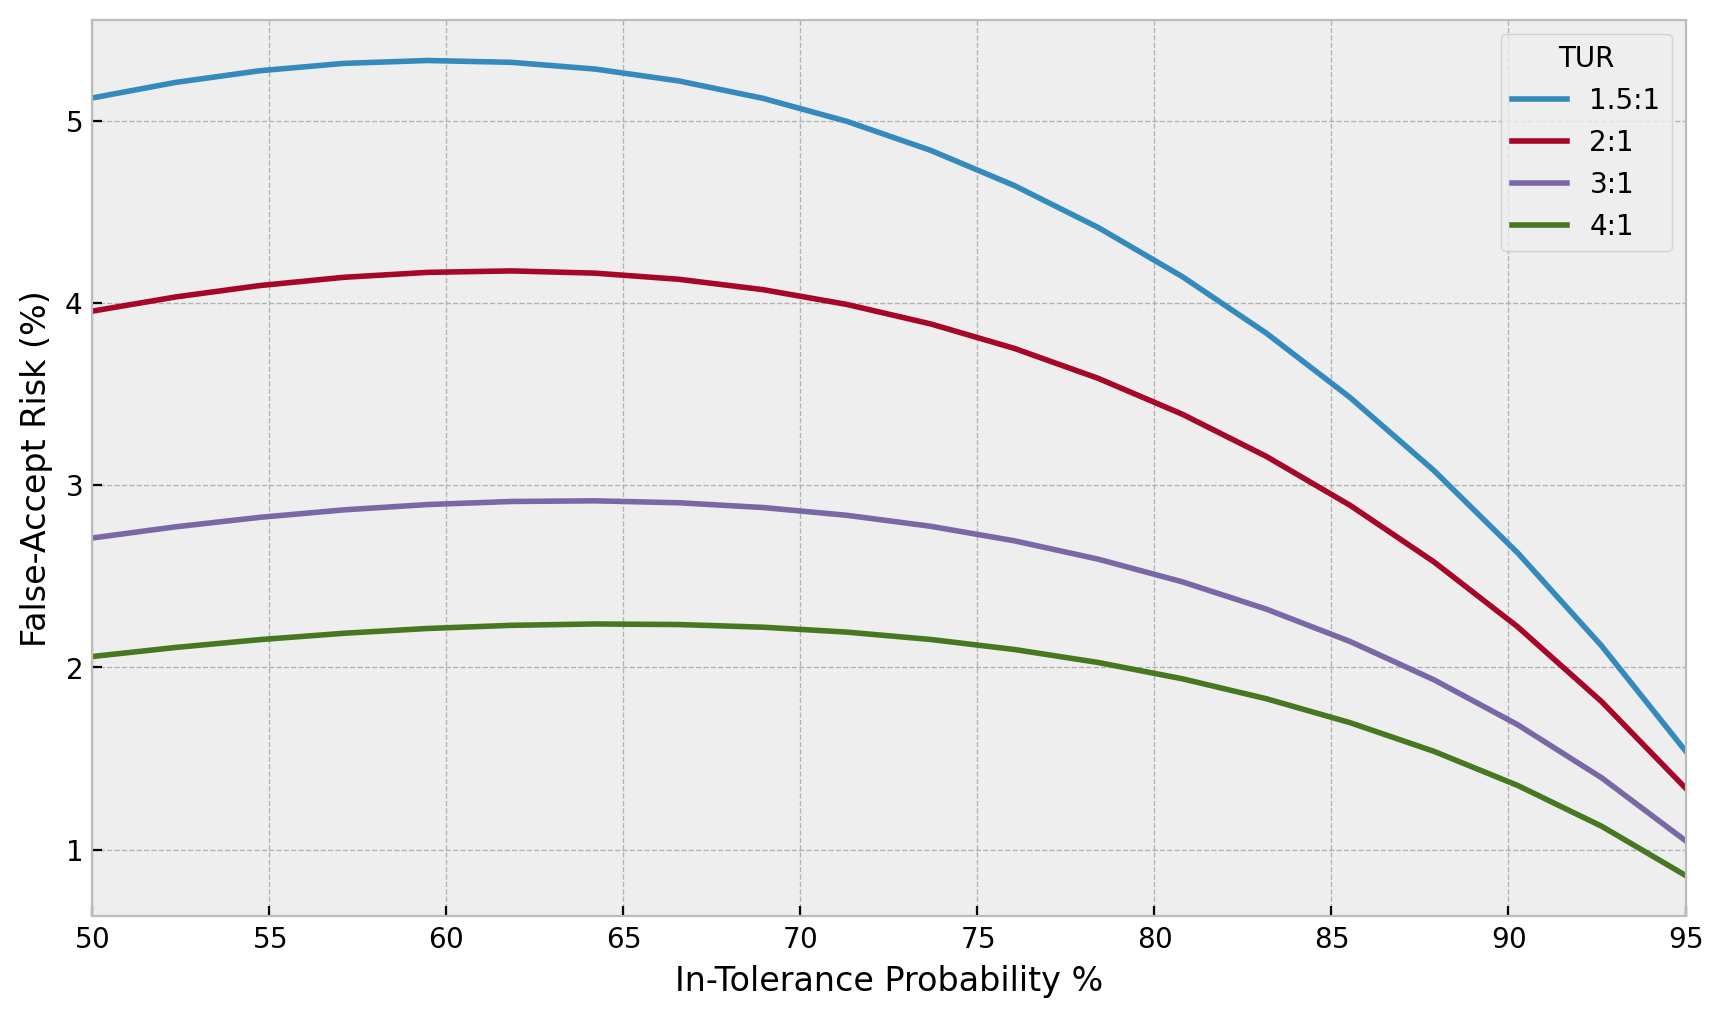

In [18]:
from suncal import risk
from scipy import stats

itplist = np.linspace(50, 95, num=20) / 100
TURlist = np.array([1.5, 2, 3, 4])

fig, ax = plt.subplots()

for i, TUR in enumerate(TURlist):
    PFA = np.zeros(len(itplist))
    for j, itp in enumerate(itplist):
        PFA[j] = risk.PFA_norm(itp, TUR)
    ax.plot(itplist*100, PFA*100, label='{:g}:1'.format(TUR))

ax.set_xlabel('In-Tolerance Probability %')
ax.set_ylabel('False-Accept Risk (%)')
ax.set_xlim(50, 95)
ax.legend(title='TUR');